Given the volatility of cryptocurrencies, this research seeks to understand if swing trade XRP* will be possible by observing trends of long term as well as short term trade prices of XRP. Then use these characteristics to predict when to buy and sell XRP using classification techniques. (Since the end results are "Buy", "Sell" or "Do Nothing", Classification techniques will be used rather than Regression)

The data of XRP trade history (of 5-minute intervals) will be taken from the exchange:
https://poloniex.com


* what is XRP: https://en.wikipedia.org/wiki/Ripple_(payment_protocol)

## Import things 

In [7]:
import numpy as np

In [8]:
#from TFANN import ANNR
import matplotlib.pyplot as mpl
#from sklearn.preprocessing import scale

In [37]:
import matplotlib.pyplot as plt

In [9]:
import datetime as dt

In [10]:
from datetime import datetime

In [11]:
import numpy as np
import os
import pandas as pd
import urllib.request
     

In [12]:
from IPython.display import clear_output


## Initialisation

In [13]:
# valid period : 300, 900, 1800, 7200, 14400, 86400 :seconds
 
def GetCurDF_5min(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=300".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=300'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df



def GetCurDF_30min(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=1800".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=1800'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df



def GetCurDF_2Hours(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=7200".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=7200'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df


### Initialisation

In [14]:
# for coin in ['LSK','ETH','ETC','STR','XMR','XRP','LTC','ATOM','XMR','ZEC','BAT','SNT','BTC']:
    
for coin in ['XRP']:
    clear_output()

    starting_time_all = 1420070400
    
    list_5min = []
    list_30min = []
    list_2H = []

    while starting_time_all < datetime.timestamp(datetime.now()):
        
        timestamp_start = str(datetime.fromtimestamp(starting_time_all)).replace(':','').replace('-','').replace(' ','')

        df_5min  =  [GetCurDF_5min(coin,starting_time_all), '{0}_5min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
        for tables in [df_5min]:
            if '_5min_' in tables[1]:
                tables[0].to_csv('Coin_Data_5min/{0}.csv'.format(tables[1]))
                list_5min.append(tables[1])

        starting_time_all += 7776000
        
        
        print(coin, starting_time_all)
        
        
        
    to_save_list = [list_5min]
        
        
    for li in to_save_list:

        MyFile=open('{0}_5min_Freq.txt'.format(coin),'w')

        for element in li:
            MyFile.write(element)
            MyFile.write('\n')
        MyFile.close()
        

https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1420070400&end=1427846400&period=300
XRP 1427846400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1427846400&end=1435622400&period=300
XRP 1435622400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1435622400&end=1443398400&period=300
XRP 1443398400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1443398400&end=1451174400&period=300
XRP 1451174400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1451174400&end=1458950400&period=300
XRP 1458950400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1458950400&end=1466726400&period=300
XRP 1466726400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1466726400&end=1474502400&period=300
XRP 1474502400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&st

## Updating as wish

In [10]:
for coin in ['XRP']:
    clear_output()

    starting_time_all = 1564702500 # starting on aug 2nd 2019 due to refresh data
    
    list_5min = []
    list_30min = []
    list_2H = []

    while starting_time_all < datetime.timestamp(datetime.now()):
        
        timestamp_start = str(datetime.fromtimestamp(starting_time_all)).replace(':','').replace('-','').replace(' ','')

        df_5min  =  [GetCurDF_5min(coin,starting_time_all), '{0}_5min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
#         df_30min =  [GetCurDF_30min(coin,starting_time_all), '{0}_30min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
#         df_2Hour =  [GetCurDF_2Hours(coin,starting_time_all), '{0}_2H_Freq_starting_at_{1}'.format(coin,timestamp_start)]

        
        for tables in [df_5min]:#, df_30min , df_2Hour]:
            if '_5min_' in tables[1]:
                tables[0].to_csv('./Nov_5min_simulation/Coin_Data_5min/{0}.csv'.format(tables[1]))
                list_5min.append(tables[1])
                
#             elif '_30min_' in tables[1]:
#                 tables[0].to_csv('Coin_Data_30min/{0}.csv'.format(tables[1]))
#                 list_30min.append(tables[1])
#             else:
#                 tables[0].to_csv('Coin_Data_2H/{0}.csv'.format(tables[1]))
#                 list_2H.append(tables[1])
                
        starting_time_all += 7776000
        
        
        print(coin, starting_time_all)
        
        
        
    to_save_list = [list_5min]#, list_30min, list_2H]
        
        
    for li in to_save_list:

        if '_5min_' in li[0]:
            MyFile=open('{0}_5min_Freq.txt'.format(coin),'w')

#         elif '_30min_' in li[0]:
#             MyFile=open('{0}_30min_Freq.txt'.format(coin),'w')

#         else:
#             MyFile=open('{0}_2H_Freq.txt'.format(coin),'w')

        for element in li:
            MyFile.write(element)
            MyFile.write('\n')
        MyFile.close()
        

https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1564702500&end=1572478500&period=300
XRP 1572478500
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1572478500&end=1580254500&period=300
XRP 1580254500


### Get 5min XRP data

In [125]:
XRP = []
for myf in open('./XRP_5min_Freq.txt'):
    XRP.append(myf.replace('\n',''))

In [126]:
XRP_Data = []
for E in XRP:
    XRP_Temp = pd.read_csv('./Coin_Data_5min/{0}.csv'.format(E))
    XRP_Data.append(XRP_Temp)

In [127]:
XRP_Data = pd.concat(XRP_Data)

In [128]:
XRP_Data['datetime_real'] = XRP_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [129]:
# XRP_Data = XRP_Data[XRP_Data['date'] != 0]

# XRP_Data = XRP_Data[XRP_Data['volume'] != 0]

In [130]:
# Hour = 2
# XRP_Data['2H_RA_on_Close'.format(Hour)] = XRP_Data['close'].rolling( Hour*12).mean()

# XRP_Data['2H_RA_on_Close'] = XRP_Data['2H_RA_on_Close'].shift(1)

# XRP_Data['high_percent_dif'] = (XRP_Data['high']-XRP_Data['2H_RA_on_Close'])/XRP_Data['2H_RA_on_Close'] 

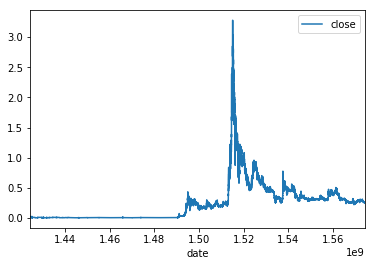

In [131]:
XRP_Data.set_index('date')[['close']].plot()

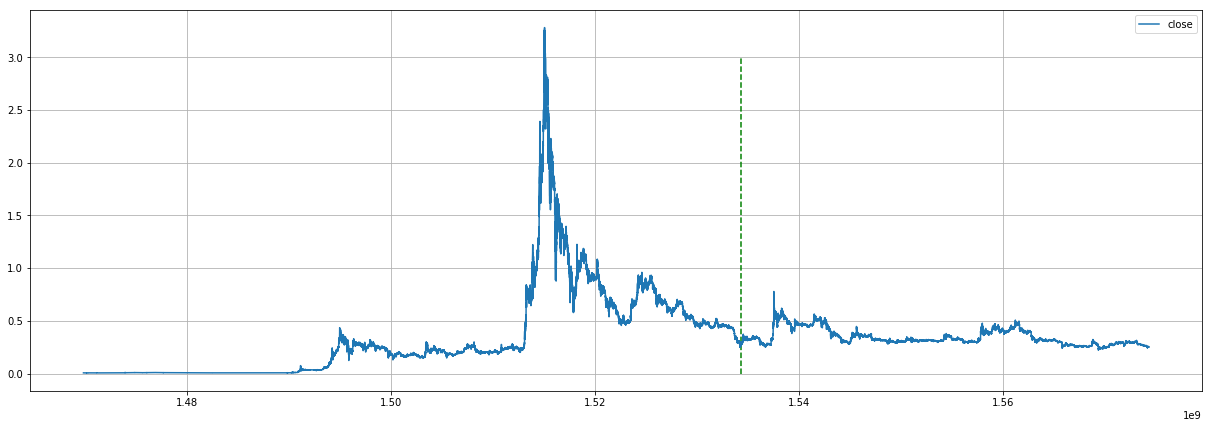

In [132]:
ploting_breakdown = XRP_Data[150000:]

plt.figure(figsize= (21,7))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']
tran_y_close = ploting_breakdown['close']

tran_x = ploting_breakdown['date']


# plt.plot(tran_x, tran_y_low, alpha = 0.1)
# plt.plot(tran_x, tran_y_high , alpha  = 0.1)

plt.plot(tran_x, tran_y_close, alpha  = 1)


# start = 45000
# dealta_t = 10000
time_section = {45000 : 13000,
                63000 : 8000 ,
                71000 : 10000,
                180000: 10000}  # start // delta_t


# for key, val in time_section.items():
#     xrp_part = ploting_breakdown[ key :   key + val ]
#     xrp_y = xrp_part['close']
#     xrp_date = xrp_part['date']

#     plt.plot(xrp_date, xrp_y, alpha  = 1, label = '{0} - {1}'.format(xrp_part['datetime_real'].min().split(' ')[0],
#                                                                      xrp_part['datetime_real'].max().split(' ')[0]))

    
#     print(xrp_part['date'].min(), xrp_part['date'].max() )
plt.vlines(1534287600, 0, 3, alpha = 1, color = 'g',linestyle = 'dashed')
    
plt.legend()
plt.grid()

In [133]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2018-08-15 00:00:00']

,Unnamed: 0,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
17844,17844,0.26425,1534287600,0.26425,0.26425,0.26425,0.0,0.0,0.26425,2018-08-15


In [134]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2019-08-15 00:00:00']

,Unnamed: 0,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
19284,19284,0.269059,1565823600,0.269059,0.269059,0.269059,0.0,0.0,0.269059,2019-08-15


In [137]:
XRP_Data_backUp = XRP_Data.copy()

In [135]:
XRP_for_training =XRP_Data[(XRP_Data['date'] >= 1534287600) &
                           (XRP_Data['date'] <1565823600)].copy()

In [136]:
XRP_for_testing =XRP_Data[(XRP_Data['date'] >= 1565823600)].copy()

## Analysis on training datasets

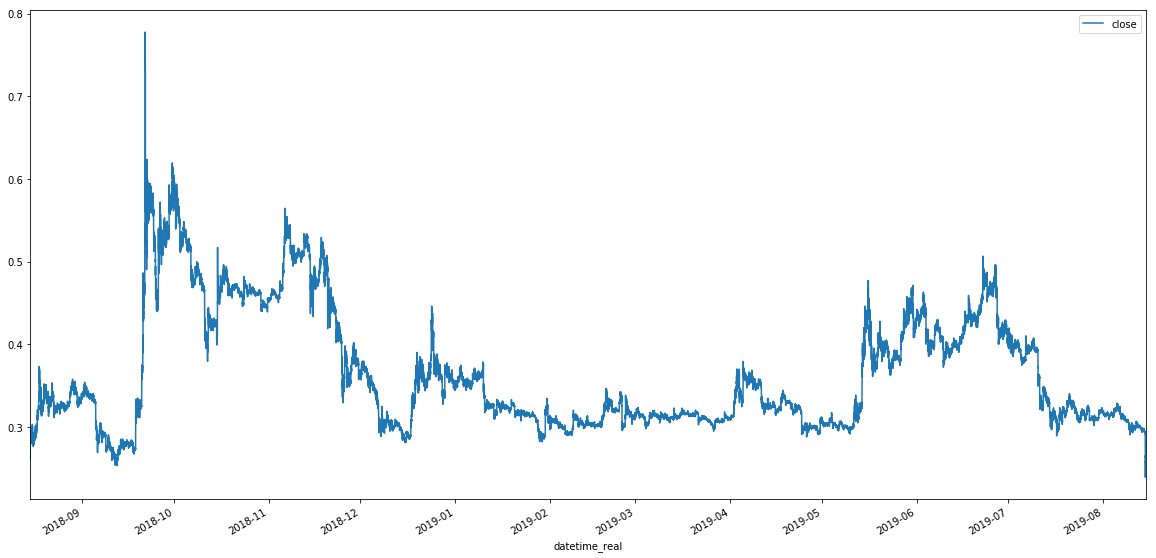

In [138]:
XRP_for_training.set_index('datetime_real')[['close']].plot(figsize = (20,10))

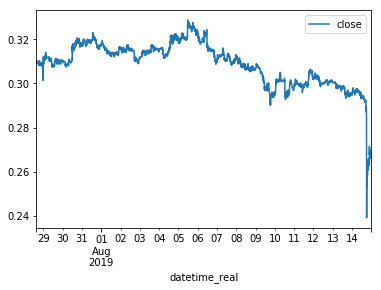

In [157]:
XRP_for_training.tail(5000).set_index('datetime_real')[['close']].plot()

In [140]:
section_period = {'20min': 4,
'1H': 12,
'2H': 24,
'4H': 48,
'12H': 144,
'24H': 288,
'5D': 1440,
'10D': 2880}

In [141]:
for k,v in section_period.items():
    XRP_for_training['{0}_RA_on_Close'.format(k)] = XRP_for_training['close'].rolling(v).mean()

In [142]:
XRP_for_training['2H_RA_on_Close'] = XRP_for_training['2H_RA_on_Close'].shift(1)

In [143]:
for col in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    XRP_for_training[col] = XRP_for_training[col].shift(1)
    
    XRP_for_training['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_training['close']-XRP_for_training[col])/XRP_for_training[col] 

In [144]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_training['look_back_{}'.format(k)] = XRP_for_training['close'].shift(v)   # i.e. 20min ago, this is what the close price is
    XRP_for_training['look_forward_{}'.format(k)] = XRP_for_training['close'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_training['calculate_look_back_Percent_{}_in_minutes'.format(k)]    = 100*(XRP_for_training['close'] - XRP_for_training['look_back_{}'.format(k)])/(5*v)
    XRP_for_training['calculate_look_forward_Percent_{}_in_minutes'.format(k)] =  100*(XRP_for_training['look_forward_{}'.format(k)] - XRP_for_training['close'])/(5*v)

20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880
20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880


In [145]:
for l_back in [d for d in XRP_for_training.columns if 'calculate_look_back' in d]:
    for l_forward in [d for d in XRP_for_training.columns if 'calculate_look_forward' in d]:
#         print(l_back, l_forward)
        XRP_for_training['B:{0},F:{1}'.format(l_back.split('_')[-3], l_forward.split('_')[-3])] = list(zip(round(XRP_for_training[l_back],4), round(XRP_for_training[l_forward],4)))

In [150]:
XRP_for_training

,Unnamed: 0,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,...,"B:5D,F:5D","B:5D,F:10D","B:10D,F:20min","B:10D,F:1H","B:10D,F:2H","B:10D,F:4H","B:10D,F:12H","B:10D,F:24H","B:10D,F:5D","B:10D,F:10D"
17844,17844,0.264250,1534287600,0.264250,0.264250,0.264250,0.000000,0.000000,0.264250,2018-08-15 00:00:00,...,"(nan, 0.0011)","(nan, 0.0004)","(nan, -0.0016)","(nan, 0.0209)","(nan, 0.0196)","(nan, 0.0104)","(nan, 0.0024)","(nan, 0.0013)","(nan, 0.0011)","(nan, 0.0004)"
17845,17845,0.261279,1534287900,0.262815,0.261279,0.262815,27478.687995,7208.096546,0.262316,2018-08-15 00:05:00,...,"(nan, 0.0012)","(nan, 0.0005)","(nan, 0.0202)","(nan, 0.0366)","(nan, 0.0184)","(nan, 0.0109)","(nan, 0.003)","(nan, 0.0015)","(nan, 0.0012)","(nan, 0.0005)"
17846,17846,0.262236,1534288200,0.262236,0.261810,0.261970,1682.103505,440.893123,0.262108,2018-08-15 00:10:00,...,"(nan, 0.0011)","(nan, 0.0005)","(nan, 0.0315)","(nan, 0.0289)","(nan, 0.0196)","(nan, 0.0089)","(nan, 0.0029)","(nan, 0.0015)","(nan, 0.0011)","(nan, 0.0005)"
17847,17847,0.263736,1534288500,0.263736,0.262554,0.262554,954.966137,251.796005,0.263670,2018-08-15 00:15:00,...,"(nan, 0.0011)","(nan, 0.0004)","(nan, 0.0321)","(nan, 0.0228)","(nan, 0.0183)","(nan, 0.0088)","(nan, 0.0028)","(nan, 0.0012)","(nan, 0.0011)","(nan, 0.0004)"
17848,17848,0.263922,1534288800,0.263922,0.263736,0.263736,7670.160000,2023.001566,0.263750,2018-08-15 00:20:00,...,"(nan, 0.0011)","(nan, 0.0004)","(nan, 0.0445)","(nan, 0.0218)","(nan, 0.0167)","(nan, 0.0092)","(nan, 0.0028)","(nan, 0.0011)","(nan, 0.0011)","(nan, 0.0004)"
17849,17849,0.265328,1534289100,0.266999,0.264297,0.264500,32284.998242,8566.414443,0.265337,2018-08-15 00:25:00,...,"(nan, 0.0011)","(nan, 0.0004)","(nan, 0.0118)","(nan, 0.0175)","(nan, 0.0156)","(nan, 0.0087)","(nan, 0.0026)","(nan, 0.0011)","(nan, 0.0011)","(nan, 0.0004)"
17850,17850,0.268536,1534289400,0.268536,0.265529,0.265529,276.345759,74.022460,0.267862,2018-08-15 00:30:00,...,"(nan, 0.001)","(nan, 0.0004)","(nan, -0.0006)","(nan, 0.0191)","(nan, 0.0137)","(nan, 0.0066)","(nan, 0.0021)","(nan, 0.0008)","(nan, 0.001)","(nan, 0.0004)"
17851,17851,0.270148,1534289700,0.271036,0.267706,0.268536,143094.955101,38627.763213,0.269945,2018-08-15 00:35:00,...,"(nan, 0.001)","(nan, 0.0004)","(nan, 0.0107)","(nan, 0.0123)","(nan, 0.0133)","(nan, 0.0055)","(nan, 0.0019)","(nan, 0.0007)","(nan, 0.001)","(nan, 0.0004)"
17852,17852,0.272831,1534290000,0.272831,0.270148,0.270148,29245.594663,7969.996951,0.272520,2018-08-15 00:40:00,...,"(nan, 0.0009)","(nan, 0.0004)","(nan, 0.0197)","(nan, 0.012)","(nan, 0.0114)","(nan, 0.0051)","(nan, 0.0016)","(nan, 0.0006)","(nan, 0.0009)","(nan, 0.0004)"
17853,17853,0.267684,1534290300,0.272275,0.267684,0.271203,43313.319112,11673.810168,0.269520,2018-08-15 00:45:00,...,"(nan, 0.001)","(nan, 0.0004)","(nan, 0.0777)","(nan, 0.0159)","(nan, 0.0147)","(nan, 0.0074)","(nan, 0.0024)","(nan, 0.0008)","(nan, 0.001)","(nan, 0.0004)"
